In [118]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics as ms
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [119]:
# reading data
salary_data = pd.read_csv('Salary_Data.csv')

In [120]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [121]:
# getting the statistical summary
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [134]:
salary_data.shape

(30, 2)

In [122]:
#droping the Salary column to get the features data
features=salary_data.drop(['Salary'],axis=1)

#labels data
labels=salary_data['Salary']

In [123]:
Xtrain,Xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.3,random_state=0)
ridge_model= LinearRegression().fit(Xtrain,ytrain)

In [124]:
ridge_model.intercept_

26777.391341197632

In [125]:
ridge_model.coef_

array([9360.26128619])

In [126]:
train1_pred=ridge_model.predict(Xtrain)
test1_pred=ridge_model.predict(Xtest)
print("Training Err:",np.sqrt(mean_squared_error(ytrain,train1_pred)))
print("training accuracy",r2_score(ytrain,train1_pred))
print("Testing Err:",np.sqrt(mean_squared_error(ytest,test1_pred)))
print("training accuracy",r2_score(ytest,test1_pred))

Training Err: 5925.8782160841465
training accuracy 0.9423777652193379
Testing Err: 4834.260936361728
training accuracy 0.9740993407213511


In [127]:
alphas=np.linspace(0,1,1000)

In [128]:
ridge_cv=RidgeCV(alphas,scoring="neg_mean_squared_error",cv=10,normalize=True)
ridge_cv.fit(Xtrain,ytrain)
ridge_cv.alpha_

0.007007007007007007

In [129]:
ridge_tuned=Ridge(alpha=0.000707).fit(Xtrain,ytrain)
# y_pred=ridge_tuned.predict(Xtest)
# np.sqrt(mean_squared_error(ytest,y_pred))

In [130]:
train2_pred=ridge_tuned.predict(Xtrain)
test2_pred=ridge_tuned.predict(Xtest)
print("Training Err:",np.sqrt(mean_squared_error(ytrain,train2_pred)))
print("training accuracy",r2_score(ytrain,train2_pred))
print("Testing Err:",np.sqrt(mean_squared_error(ytest,test2_pred)))
print("training accuracy",r2_score(ytest,test2_pred))

Training Err: 5925.878217362424
training accuracy 0.9423777651944785
Testing Err: 4834.276798706229
training accuracy 0.9740991707487907


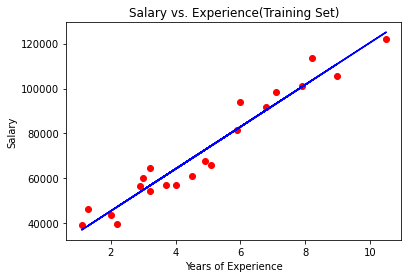

In [131]:
# visualizing the training set result
plt.scatter(Xtrain,ytrain,color='red')
plt.plot(Xtrain,ridge_model.predict(Xtrain),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Experience(Training Set)')
plt.show()

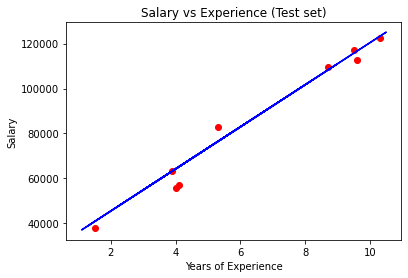

In [132]:
# visualizing the test set result
plt.scatter(Xtest,ytest,color='red')
plt.plot(Xtrain,ridge_model.predict(Xtrain),color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [133]:
from sklearn import metrics as ms
accuracy2=ms.accuracy_score(ytest,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [9, 6]